Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.dropna()

dates = df.index.values
df = df.select_dtypes(exclude=["object"])

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Create the model

In [4]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

In [5]:
pred = model.predict(test.drop(columns=[target_column]))

In [6]:
test.drop(columns=[target_column])

,New_cases_30_days_ago
Date_reported,
2023-07-07,31959.0
2023-07-08,22513.0
2023-07-09,25419.0
2023-07-10,29591.0
2023-07-11,96321.0
...,...
2023-11-18,8545.0
2023-11-19,8485.0
2023-11-20,9183.0


In [7]:
non_zero = []
for i in pred:
    removed_initial_one = i-1
    if removed_initial_one == 0:
        non_zero.append(removed_initial_one+sys.float_info.min)
    else:
        non_zero.append(removed_initial_one)

Plot the result

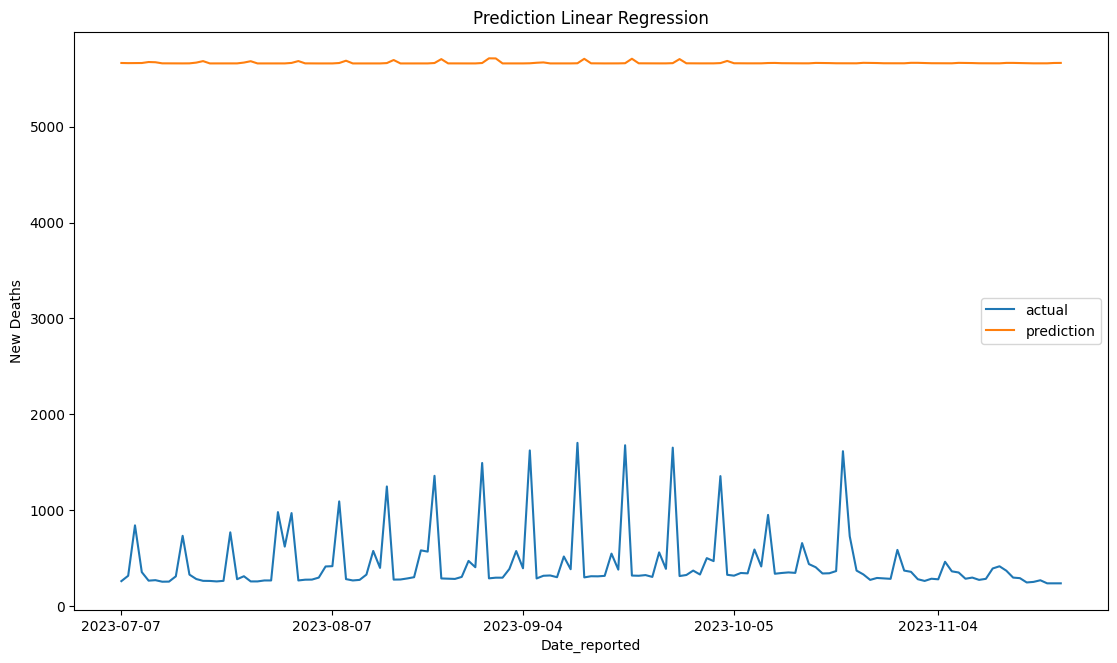

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], (test[target_column]-1).values, label="actual")
ax.plot(dates[int(data_length*train_split):], non_zero, label="prediction")
ax.set_title("Prediction Linear Regression")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [9]:
print_evaluation_metrics(non_zero, test[target_column]-1, train[target_column]-1)

Evaluation Metrics:
MSE: 27336906.89
RMSE: 5228.47
MAE: 5218.22
MAPE: 1511.31
SMAPE: 171.64
MASE: 3.04


In [10]:
store_model(model, "regression")